# K-Nearest Neighbours Classification

## K nearest neighbors
		
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Algorithm: 
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.

## Classification - Personal Loan Dataset

This case is about a bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Dataset Description**:

| Feature | Description |
| --- | --- |
| ID | Customer ID |
| Age | Customer's age in completed years |
| Experience | # years of professional experience |
| Income | Annual income of the customer (In 1,000 dollars) |
| ZIPcode | Home address ZIP code |
| Family | Family size of the customer |
| CCAvg | Average monthly spending on credit cards (In 1,000 dollars) |
| Education | Education level: 1: undergrad; 2: Graduate; 3: Advance/Professional |
| Mortgage | Mortgage Value of house mortgage if any. (In 1,000 dollars) |
| Securities Acct | Does the customer have a securities account with the bank? |
| CD Account | Does the customer have a certifcate of deposit (CD) account with the bank? |
| Online | Does the customer use internet bank facilities? |
| CreditCard | Does the customer use a credit card issued by the UniversalBank? |
| **Personal loan** | **Did this customer accept the personal loan offered in he last campaign? 1: yes; 0: no (target variable)** | 

**The classification goal is to predict if the client will subscribe (yes/no) a term loan (variable y).**
___

The dataset is available at the path `datasets` from the current directory.

#### Import all the required packages and classes

In [2]:
import math
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 


from imblearn.under_sampling import CondensedNearestNeighbour


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

!pip install imblearn

#### Read the data

In [3]:
univbank = pd.read_csv("UnivBank.csv",na_values=["?","#"])

In [4]:
print('Dataset has ' + str(univbank.shape[0]) + ' rows, and ' + str(univbank.shape[1]) + ' columns')

Dataset has 5000 rows, and 14 columns


#### Display the first 5 records

In [5]:
univbank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0,1.0,0.0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0,1.0,0.0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0,0.0,0.0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0,0.0,NaN,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0,0.0,0.0,0,1


#### Display the dimensions, column names and column datatypes

In [6]:
print(univbank.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [7]:
print(univbank.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage              float64
Personal Loan           int64
Securities Account    float64
CD Account            float64
Online                  int64
CreditCard              int64
dtype: object


#### Check the summary (descriptive statistics)  for all attributes

In [8]:
univbank.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,4998.000000,4999.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.521409,0.096000,0.104442,0.060412,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.727873,0.294621,0.305863,0.238273,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check the unique levels in the target attribute PersonalLoan 

In [9]:
print(univbank["CD Account"].value_counts())

0.0    4697
1.0     302
Name: CD Account, dtype: int64


In [10]:
'Online','',''

('Online', '', '')

In [11]:
print(univbank["Online"].value_counts())

1    2984
0    2016
Name: Online, dtype: int64


In [12]:
print(univbank["CreditCard"].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


In [13]:
print(univbank["Personal Loan"].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


In [14]:
print(univbank['Personal Loan'].value_counts(normalize=True)*100)

0    90.4
1     9.6
Name: Personal Loan, dtype: float64


#### Check the number of unique ZIP Codes present in the dataset 

In [15]:
print("The number of Unique ZIP Codes in the bank data set is",univbank['ZIP Code'].nunique())

The number of Unique ZIP Codes in the bank data set is 467


94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIP Code, Length: 467, dtype: int64


#### Check the 'ID' present in the dataset 

In [16]:
print("The number of Unique ID in the bank data set is",univbank['ID'].nunique())

The number of Unique ID in the bank data set is 5000


1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64


#### Remove the unncessary columns (ID and ZipCode)

In [17]:
univbank = univbank.drop(["ID","ZIP Code"],axis=1)

In [18]:
univbank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0,1.0,0.0,0,0
1,45,19,34,3,1.5,1,0.0,0,1.0,0.0,0,0
2,39,15,11,1,1.0,1,0.0,0,0.0,0.0,0,0
3,35,9,100,1,2.7,2,0.0,0,0.0,NaN,0,0
4,35,8,45,4,1.0,2,0.0,0,0.0,0.0,0,1


#### Check the count of Education values in each level

In [19]:
print("The number of values in different Education levels:\n")
print(univbank['Education'].value_counts())

The number of values in different Education levels:

1    2096
3    1501
2    1403
Name: Education, dtype: int64


#### Check the count of Family values in each level

In [20]:
print("The number of values in different Family levels:\n")
print(univbank['Family'].value_counts())

The number of values in different Family levels:

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


#### Convert the attributes to the right data type based on the dataset description

In [21]:
cat_attr = ['Education', 'Family', 'CD Account', 'Online','CreditCard','Securities Account']
for cols in cat_attr :
    univbank[cols] = univbank[cols].astype('category')

In [22]:
univbank.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage               float64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

#### Creating dummy variables

If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. 
So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category.


In [23]:
univbank = pd.get_dummies(columns=cat_attr,data=univbank)

In [24]:
univbank.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3,Family_1,...,Family_3,Family_4,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1,Securities Account_0.0,Securities Account_1.0
0,25,1,49,1.6,0.0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,45,19,34,1.5,0.0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,39,15,11,1.0,0.0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100,2.7,0.0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
4,35,8,45,1.0,0.0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0


In [25]:
univbank.shape

(5000, 21)

####  Check for missing values 

In [26]:
univbank.isnull().sum()

Age                       0
Experience                0
Income                    0
CCAvg                     0
Mortgage                  2
Personal Loan             0
Education_1               0
Education_2               0
Education_3               0
Family_1                  0
Family_2                  0
Family_3                  0
Family_4                  0
CD Account_0.0            0
CD Account_1.0            0
Online_0                  0
Online_1                  0
CreditCard_0              0
CreditCard_1              0
Securities Account_0.0    0
Securities Account_1.0    0
dtype: int64

#### Split the data into train and test

In [27]:
y = univbank["Personal Loan"]
X = univbank.drop('Personal Loan', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 20)
(1000, 20)
(4000,)
(1000,)


In [29]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3616
1     384
Name: Personal Loan, dtype: int64
0    904
1     96
Name: Personal Loan, dtype: int64


#### Split the attributes into numerical and categorical types

In [30]:
X_train.dtypes

Age                         int64
Experience                  int64
Income                      int64
CCAvg                     float64
Mortgage                  float64
Education_1                 uint8
Education_2                 uint8
Education_3                 uint8
Family_1                    uint8
Family_2                    uint8
Family_3                    uint8
Family_4                    uint8
CD Account_0.0              uint8
CD Account_1.0              uint8
Online_0                    uint8
Online_1                    uint8
CreditCard_0                uint8
CreditCard_1                uint8
Securities Account_0.0      uint8
Securities Account_1.0      uint8
dtype: object

In [31]:
for cols in X_train.columns :
    if X_train[cols].dtype == 'uint8':
        X_train[cols]=X_train[cols].astype('category')

In [32]:
for cols in X_test.columns :
    if X_test[cols].dtype == 'uint8':
        X_test[cols]=X_test[cols].astype('category')

In [33]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [34]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'CD Account_0.0', 'CD Account_1.0', 'Online_0',
       'Online_1', 'CreditCard_0', 'CreditCard_1', 'Securities Account_0.0',
       'Securities Account_1.0'],
      dtype='object')

#### Checking for missing values in train and test dataset

In [35]:
X_train.isnull().sum()

Age                       0
Experience                0
Income                    0
CCAvg                     0
Mortgage                  1
Education_1               0
Education_2               0
Education_3               0
Family_1                  0
Family_2                  0
Family_3                  0
Family_4                  0
CD Account_0.0            0
CD Account_1.0            0
Online_0                  0
Online_1                  0
CreditCard_0              0
CreditCard_1              0
Securities Account_0.0    0
Securities Account_1.0    0
dtype: int64

In [36]:
X_test.isnull().sum()

Age                       0
Experience                0
Income                    0
CCAvg                     0
Mortgage                  1
Education_1               0
Education_2               0
Education_3               0
Family_1                  0
Family_2                  0
Family_3                  0
Family_4                  0
CD Account_0.0            0
CD Account_1.0            0
Online_0                  0
Online_1                  0
CreditCard_0              0
CreditCard_1              0
Securities Account_0.0    0
Securities Account_1.0    0
dtype: int64

#### Imputing missing values with median

In [37]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])

In [38]:
imputer.statistics_

array([45. , 20. , 63.5,  1.5,  0. ])

In [39]:
X_train['Mortgage'].median()

0.0

In [40]:
X_train.isnull().sum()

Age                       0
Experience                0
Income                    0
CCAvg                     0
Mortgage                  0
Education_1               0
Education_2               0
Education_3               0
Family_1                  0
Family_2                  0
Family_3                  0
Family_4                  0
CD Account_0.0            0
CD Account_1.0            0
Online_0                  0
Online_1                  0
CreditCard_0              0
CreditCard_1              0
Securities Account_0.0    0
Securities Account_1.0    0
dtype: int64

In [41]:
X_test.isnull().sum()

Age                       0
Experience                0
Income                    0
CCAvg                     0
Mortgage                  0
Education_1               0
Education_2               0
Education_3               0
Family_1                  0
Family_2                  0
Family_3                  0
Family_4                  0
CD Account_0.0            0
CD Account_1.0            0
Online_0                  0
Online_1                  0
CreditCard_0              0
CreditCard_1              0
Securities Account_0.0    0
Securities Account_1.0    0
dtype: int64

#### Imputation for missing values for categoric attributes

In [42]:
imputer_cat = SimpleImputer(strategy='most_frequent')

imputer_cat = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer_cat.transform(X_train[cat_attr])
X_test[cat_attr] = imputer_cat.transform(X_test[cat_attr])

###  Activity on sampling and scaling

#### Standardize the data (numerical attributes only) - Import StandardScaler


In [43]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [44]:
X_train[num_attr]=scaler.transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

#### Build KNN Classifier Model

In [45]:
model_knn= KNeighborsClassifier(n_neighbors=3)  #n_neighbors=5 (By default)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Predict on the Test data

In [46]:
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn  = model_knn.predict(X_test)

#### FIne the recall classification score

Accuracy on training set: 0.972
Accuracy on testing set: 0.950

In [47]:
print("Accuracy on training set: {:.3f}".format(model_knn.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(model_knn.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on testing set: 0.953


In [48]:
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3616
           1       0.99      0.77      0.87       384

    accuracy                           0.98      4000
   macro avg       0.98      0.89      0.93      4000
weighted avg       0.98      0.98      0.98      4000



    precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.87      0.56

In [49]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.90      0.57      0.70        96

    accuracy                           0.95      1000
   macro avg       0.93      0.78      0.84      1000
weighted avg       0.95      0.95      0.95      1000



#### Building a logistic regression model

In [50]:
log_mod = LogisticRegression()

In [51]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_train_pred_logistic = log_mod.predict(X_train)
y_test_pred_logistic = log_mod.predict(X_test)

In [53]:
print("Accuracy on training set: {:.3f}".format(log_mod.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(log_mod.score(X_test, y_test)))

Accuracy on training set: 0.961
Accuracy on testing set: 0.960


In [54]:
print(classification_report(y_train, y_train_pred_logistic))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3616
           1       0.89      0.68      0.77       384

    accuracy                           0.96      4000
   macro avg       0.93      0.84      0.88      4000
weighted avg       0.96      0.96      0.96      4000



In [55]:
print(classification_report(y_test, y_test_pred_logistic))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       904
           1       0.92      0.64      0.75        96

    accuracy                           0.96      1000
   macro avg       0.94      0.81      0.87      1000
weighted avg       0.96      0.96      0.96      1000



In [56]:
# predict probabilities
pred_prob1 = log_mod.predict_proba(X_test)
pred_prob2 = model_knn.predict_proba(X_test)

In [57]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [58]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9456466629793511 0.9013297382005899


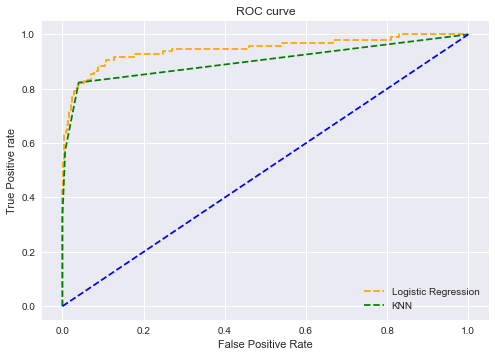

In [59]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Finding out the IDEAL K-value for the given dataset

### Method-1

In [60]:
# Creating list of different K values for KNN
kvalues = list(range(2,12))

In [61]:
kvalues

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [62]:
# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in kvalues:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    print("scores=",scores)
    cv_scores.append(scores.mean())
    print("cv_scores=",cv_scores)

scores= [0.43421053 0.46753247 0.4025974  0.51948052 0.45454545]
cv_scores= [0.4556732740943267]
scores= [0.57894737 0.62337662 0.54545455 0.67532468 0.57142857]
cv_scores= [0.4556732740943267, 0.5989063568010936]
scores= [0.43421053 0.53246753 0.44155844 0.50649351 0.41558442]
cv_scores= [0.4556732740943267, 0.5989063568010936, 0.46606288448393707]
scores= [0.51315789 0.61038961 0.48051948 0.57142857 0.50649351]
cv_scores= [0.4556732740943267, 0.5989063568010936, 0.46606288448393707, 0.5363978127136022]
scores= [0.42105263 0.51948052 0.37662338 0.50649351 0.4025974 ]
cv_scores= [0.4556732740943267, 0.5989063568010936, 0.46606288448393707, 0.5363978127136022, 0.4452494873547505]
scores= [0.47368421 0.62337662 0.45454545 0.55844156 0.51948052]
cv_scores= [0.4556732740943267, 0.5989063568010936, 0.46606288448393707, 0.5363978127136022, 0.4452494873547505, 0.5259056732740943]
scores= [0.39473684 0.54545455 0.38961039 0.50649351 0.4025974 ]
cv_scores= [0.4556732740943267, 0.598906356801093

In [63]:
np.array([0.42105263,0.32467532,0.33766234,0.45454545,0.32467532]).mean()

0.37252221199999996

In [64]:
cv_scores

[0.4556732740943267,
 0.5989063568010936,
 0.46606288448393707,
 0.5363978127136022,
 0.4452494873547505,
 0.5259056732740943,
 0.4477785372522215,
 0.5051606288448394,
 0.4374231032125769,
 0.4816814764183185]

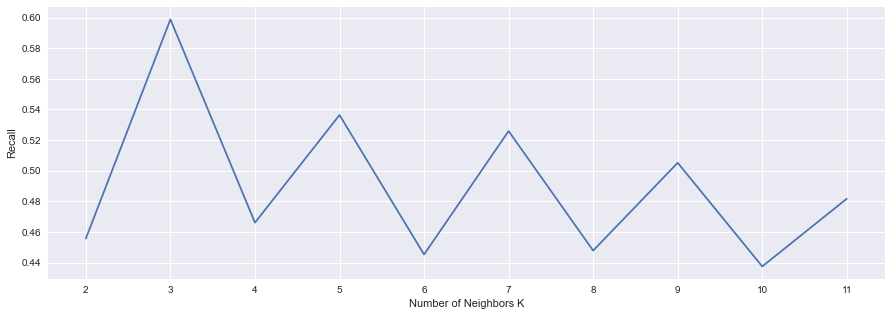

In [65]:
# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(kvalues, cv_scores)

plt.xticks(np.arange(2, 12, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Recall')
plt.show()

### Method-2: GridSearch Cross validation

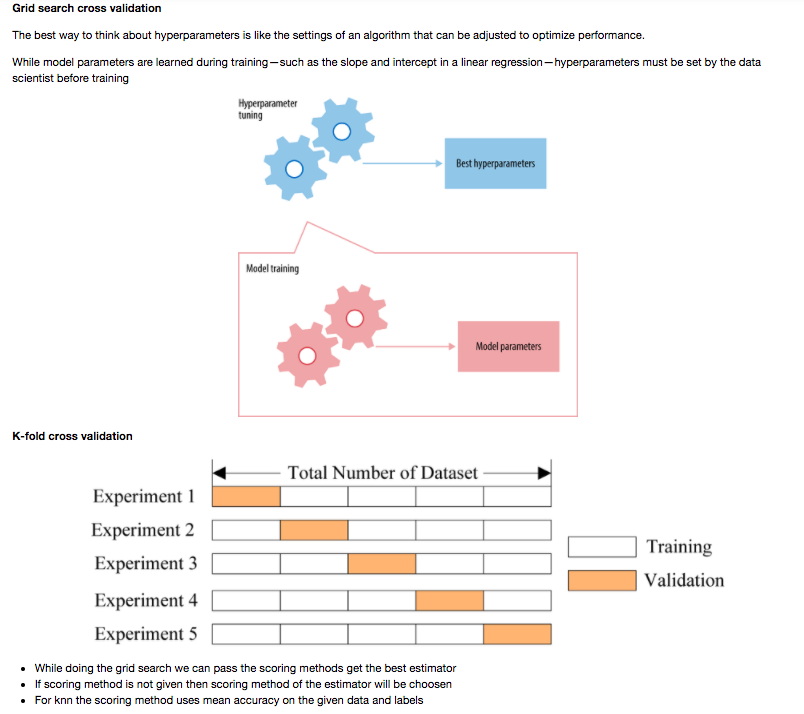

### K-fold Cross Validation:

#### 1. Use the GridSearchCV 

In [66]:
parameters = {'n_neighbors':list(range(2,12))}

clf = GridSearchCV(KNeighborsClassifier(metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=5,scoring='recall')

clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.0s finished


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_jobs=-1),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='recall', verbose=1)

In [67]:
knn_model = clf.best_estimator_
knn_model

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3)

In [68]:
print (clf.best_score_, clf.best_params_) 

0.5989063568010936 {'n_neighbors': 3}


#### 2. Predict on the test data using the best model

In [69]:
y_pred_test=knn_model.predict(X_test)

In [70]:
y_train_pred = knn_model.predict(X_train)
y_test_pred  = knn_model.predict(X_test)

In [71]:
y_pred_test[:5]

array([0, 0, 0, 0, 0])

In [72]:
print("Accuracy on training set: {:.3f}".format(knn_model.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(knn_model.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on testing set: 0.953


In [73]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3616
           1       0.99      0.77      0.87       384

    accuracy                           0.98      4000
   macro avg       0.98      0.89      0.93      4000
weighted avg       0.98      0.98      0.98      4000



In [74]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.90      0.57      0.70        96

    accuracy                           0.95      1000
   macro avg       0.93      0.78      0.84      1000
weighted avg       0.95      0.95      0.95      1000



#### 3. Compute confusion matrix to evaluate the accuracy of the classification 

In [75]:
print(confusion_matrix(y_test, y_pred_test))

[[898   6]
 [ 41  55]]


#### 4.  classification score

In [76]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred_test))

0.5729166666666666


## CNN With KNN

In [77]:
cnn = CondensedNearestNeighbour(n_neighbors=3)
X_cnn_train, y_cnn_train = cnn.fit_sample(X_train, y_train)
X_cnn_test, y_cnn_test = cnn.fit_sample(X_test,y_test)

In [78]:
X_train.shape

(4000, 20)

In [79]:
X_cnn_train.shape

(692, 20)

In [80]:
X_cnn_train.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,CD Account_0.0,CD Account_1.0,Online_0,Online_1,CreditCard_0,CreditCard_1,Securities Account_0.0,Securities Account_1.0
0,0.587547,0.695376,-0.043503,-1.103894,1.193196,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.256633,-1.323642,0.794945,-0.990617,-0.559325,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.641364,1.748777,1.224918,1.048374,-0.559325,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.851001,0.783159,-0.043503,-0.933978,0.887982,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.377910,1.397643,-1.376419,-0.877340,-0.559325,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [81]:
X_test.shape

(1000, 20)

In [82]:
X_cnn_test.shape

(207, 20)

In [83]:
y_cnn_train.shape

(692,)

In [84]:
y_cnn_test.shape

(207,)

### KNN

In [85]:
cnn_model= KNeighborsClassifier(n_neighbors=3)
cnn_model.fit(X_cnn_train,y_cnn_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
y_train_pred_cnn = cnn_model.predict(X_cnn_train)
y_test_pred_cnn  = cnn_model.predict(X_cnn_test)

In [87]:
print("Accuracy on training set: {:.3f}".format(cnn_model.score(X_cnn_train, y_cnn_train)))
print("Accuracy on testing set: {:.3f}".format(cnn_model.score(X_cnn_test, y_cnn_test)))

Accuracy on training set: 0.899
Accuracy on testing set: 0.850


In [88]:
print(classification_report(y_cnn_train, y_train_pred_cnn))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       308
           1       0.91      0.90      0.91       384

    accuracy                           0.90       692
   macro avg       0.90      0.90      0.90       692
weighted avg       0.90      0.90      0.90       692



In [89]:
print(classification_report(y_cnn_test, y_test_pred_cnn))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.87      0.80      0.83        96

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



### Reference: 

Regressor:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

GridSearchCV:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html